In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

/home/ganesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ganesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ganesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ganesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import csv

x=[]
y=[]
with open('foo1.txt') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            xx = float(row[0])
            yy = float(row[1])
            p =[xx]
            q =[yy]
            x.append(p)
            y.append(q)
                        
x=np.array(x)
y=np.array(y)
n = len(x)

/home/ise/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ise/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


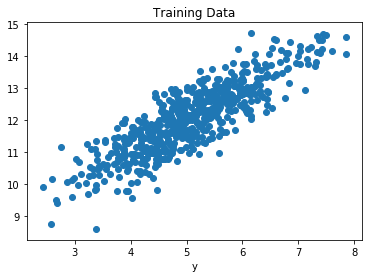

In [3]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [4]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

In [5]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

In [6]:
learning_rate = 0.01
training_epochs = 1000


In [7]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 


In [8]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
    
    # Initializing the Variables 
    sess.run(init) 
    
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
        
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
        
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
    
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 


Epoch 50 : cost = 0.99301046 W = 2.2366915 b = 0.53824925
Epoch 100 : cost = 0.9637399 W = 2.2139268 b = 0.6570779
Epoch 150 : cost = 0.93548477 W = 2.191553 b = 0.77382404
Epoch 200 : cost = 0.9082104 W = 2.1695752 b = 0.888525
Epoch 250 : cost = 0.8818807 W = 2.1479764 b = 1.0012237
Epoch 300 : cost = 0.8564637 W = 2.1267536 b = 1.1119529
Epoch 350 : cost = 0.83193004 W = 2.1059089 b = 1.2207371
Epoch 400 : cost = 0.8082507 W = 2.0854316 b = 1.3276029
Epoch 450 : cost = 0.78538907 W = 2.06531 b = 1.4326149
Epoch 500 : cost = 0.76331925 W = 2.0455422 b = 1.5357953
Epoch 550 : cost = 0.7420059 W = 2.026102 b = 1.6372111
Epoch 600 : cost = 0.72143483 W = 2.0070102 b = 1.7368397
Epoch 650 : cost = 0.7015789 W = 1.9882554 b = 1.8347181
Epoch 700 : cost = 0.68241954 W = 1.9698324 b = 1.9308423
Epoch 750 : cost = 0.66391844 W = 1.9517288 b = 2.0253181
Epoch 800 : cost = 0.646063 W = 1.9339434 b = 2.118119
Epoch 850 : cost = 0.62881464 W = 1.9164592 b = 2.2093618
Epoch 900 : cost = 0.6121582

In [9]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Training cost = 0.58058363 Weight = 1.8658267 bias = 2.47359 



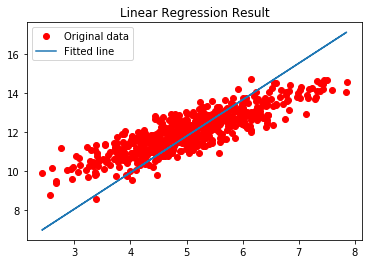

In [10]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 
